# 안녕하세요^^ 
## AIVLE '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [80]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 기본전제
* 처음에 제공되는 기본/추가 데이터는 '에이블러용' 폴더에 있습니다.

[기본 데이터]
* seoul_moving_month_202401.csv

[데이터 소개]
* 서울 시 구별 이동 2024년 1월 데이터
* https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_202401.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_202401.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [81]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

import pandas as pd
seoul_moving = pd.read_csv('1.2 seoul_moving_month_202401.csv',sep=",", encoding = 'UTF-8')

In [82]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(29361031, 10)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [83]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# describe()
seoul_moving.describe().T

,count,mean,std,min,25%,50%,75%,max
대상연월,29361031.0,202401.000000,0.000000,202401.0,202401.0,202401.0,202401.0,202401.0
도착시간,29361031.0,13.621945,5.835017,0.0,10.0,14.0,18.0,23.0
출발 시군구 코드,29361031.0,17105.376242,9024.981434,11010.0,11100.0,11200.0,31014.0,39000.0
도착 시군구 코드,29361031.0,17181.227121,9037.102181,11010.0,11110.0,11200.0,31014.0,39000.0
나이,29361031.0,42.859793,17.994559,0.0,30.0,40.0,55.0,80.0
평균 이동 시간(분),29361031.0,93.666260,78.033161,1.0,49.0,74.0,112.0,4462.0


In [84]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# info()
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.2+ GB


In [85]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90


* 1번 열의 의미
    * " 2024년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 E(기타)로 이동한 10 ~ 15세 여성은 총 11.96명이며 이들의 평균 이동시간은 167분이다


#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '이동인구(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)
    - 3명 미만의 이동인구는 * 처리 되어 있어서 해당 값을 나름의 기준으로 변경하세요.(중위값)
    - '이동인구(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [86]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# value_counts()
seoul_moving['이동인구(합)'].value_counts()

이동인구(합)
*          3870174
6.05        420734
3.30        397265
3.29        286071
3.31        234821
            ...   
1617.95          1
2414.11          1
1499.98          1
1478.45          1
689.93           1
Name: count, Length: 140404, dtype: int64

In [87]:
seoul_moving[seoul_moving['이동인구(합)'] == '*']

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
14,202401,일,0,11010,11010,F,20,EW,11,*
17,202401,일,0,11010,11010,F,20,HW,18,*
38,202401,일,0,11010,11010,F,30,WW,12,*
126,202401,일,0,11010,11010,M,20,HW,11,*
229,202401,일,0,11010,11020,F,20,WW,17,*
...,...,...,...,...,...,...,...,...,...,...
29361022,202401,토,23,39000,11250,M,30,EE,166,*
29361024,202401,토,23,39000,11250,M,30,HE,232,*
29361025,202401,토,23,39000,11250,M,35,EE,148,*
29361026,202401,토,23,39000,11250,M,35,EH,229,*


In [88]:
# '*' 값의 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체 (1.5명)

seoul_moving['이동인구(합)'].replace('*', 1.5, inplace=True)

In [89]:
seoul_moving[seoul_moving['이동인구(합)'] == '*']

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)


In [90]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
# astype()

seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].astype('float')

In [91]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.2+ GB


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [92]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 이동유형, value_counts()
seoul_moving['이동유형'].value_counts()

이동유형
EH    5947038
HE    5585412
EE    5224553
WH    3078348
WE    2759477
HW    2700535
EW    2330931
WW    1082641
HH     652096
Name: count, dtype: int64

In [93]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 요일, value_counts()
seoul_moving['요일'].value_counts()

요일
월    4448237
수    4341429
화    4300070
토    4254525
금    4251430
목    4005959
일    3759381
Name: count, dtype: int64

* 24년 1월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 5, 화 : 5, 수 : 5, 목 : 4, 금 : 4, 토 : 4

In [94]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 성별, value_counts()
seoul_moving['성별'].value_counts()

성별
M    16433525
F    12927506
Name: count, dtype: int64

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [95]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90


In [96]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 새벽 5시까지 도착하는 이동 사례, seoul_moving_night 변수 저장

seoul_moving_night = seoul_moving.loc[seoul_moving['도착시간'] <= 5]

In [97]:
seoul_moving_night

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90
...,...,...,...,...,...,...,...,...,...,...
2868917,202401,토,5,38000,11240,M,55,HE,292,3.28
2868918,202401,토,5,39000,11130,F,50,HE,1327,3.10
2868919,202401,토,5,39000,11160,F,30,EE,1204,1.50
2868920,202401,토,5,39000,11230,F,25,EH,610,4.06


#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다.
* 시군구 코드:광역시도(2자리)+시군구(3자리) / 서울:11, 부산:26, 대구:27, 인천:28, 광주:29, 대전:30, 울산:31)

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [98]:
seoul_moving.tail()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
29361026,202401,토,23,39000,11250,M,35,EH,229,1.50
29361027,202401,토,23,39000,11250,M,40,EW,295,1.50
29361028,202401,토,23,39000,11250,M,45,EH,323,9.47
29361029,202401,토,23,39000,11250,M,50,EH,184,3.28
29361030,202401,토,23,39000,11250,M,55,EH,307,6.56


In [99]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 출발 시군구 코드, 도착 시군구 코드 <20000
only_seoul_moving = seoul_moving.loc[(seoul_moving['출발 시군구 코드'] < 20000) & (seoul_moving['도착 시군구 코드'] < 20000)]

In [100]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
only_seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90
...,...,...,...,...,...,...,...,...,...,...
29320192,202401,토,23,11250,11250,M,80,EH,18,28.41
29320193,202401,토,23,11250,11250,M,80,HE,78,9.46
29320194,202401,토,23,11250,11250,M,80,HW,168,9.48
29320195,202401,토,23,11250,11250,M,80,WH,16,47.27


#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [101]:
only_seoul_moving.head(2)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96


In [102]:
only_seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10791769 entries, 0 to 29320196
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 905.7+ MB


In [103]:
# 추가해 봄
only_seoul_moving['출발 시군구 코드'] = only_seoul_moving['출발 시군구 코드'].map({
    11010: '종로구',
    11020: '중구',
    11030: '용산구',
    11040: '성동구',
    11050: '광진구',
    11060: '동대문구',
    11070: '중랑구',
    11080: '성북구',
    11090: '강북구',
    11100: '도봉구',
    11110: '노원구',
    11120: '은평구',
    11130: '서대문구',
    11140: '마포구',
    11150: '양천구',
    11160: '강서구',
    11170: '구로구',
    11180: '금천구',
    11190: '영등포구',
    11200: '동작구',
    11210: '관악구',
    11220: '서초구',
    11230: '강남구',
    11240: '송파구',
    11250: '강동구'})

C:\Users\User\AppData\Local\Temp\ipykernel_20388\187226600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_seoul_moving['출발 시군구 코드'] = only_seoul_moving['출발 시군구 코드'].map({


In [104]:
only_seoul_moving['도착 시군구 코드'] = only_seoul_moving['도착 시군구 코드'].map({
    11010: '종로구',
    11020: '중구',
    11030: '용산구',
    11040: '성동구',
    11050: '광진구',
    11060: '동대문구',
    11070: '중랑구',
    11080: '성북구',
    11090: '강북구',
    11100: '도봉구',
    11110: '노원구',
    11120: '은평구',
    11130: '서대문구',
    11140: '마포구',
    11150: '양천구',
    11160: '강서구',
    11170: '구로구',
    11180: '금천구',
    11190: '영등포구',
    11200: '동작구',
    11210: '관악구',
    11220: '서초구',
    11230: '강남구',
    11240: '송파구',
    11250: '강동구'})

C:\Users\User\AppData\Local\Temp\ipykernel_20388\2666708628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_seoul_moving['도착 시군구 코드'] = only_seoul_moving['도착 시군구 코드'].map({


In [105]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 유출이 제일 많은 구와 적은 구는?
# 유출 최대값
only_seoul_moving.groupby(by='출발 시군구 코드', as_index=False)[['성별']].count().sort_values(by='성별', ascending=False)

,출발 시군구 코드,성별
0,강남구,586427
14,서초구,518286
23,중구,515531
19,영등포구,508445
22,종로구,507747
12,마포구,498059
17,송파구,474428
15,성동구,466867
10,동대문구,462831
20,용산구,461328


In [106]:
# 가장 유출이 많은 곳은 강남구
# 가장 유출이 적은 곳은 금천구

In [107]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 유입이 제일 많은 구와 적은 구는?
# 유입 최대값
only_seoul_moving.groupby(by='도착 시군구 코드', as_index=False)[['성별']].count().sort_values(by='성별', ascending=False)

,도착 시군구 코드,성별
0,강남구,564757
14,서초구,506191
19,영등포구,501537
23,중구,491583
12,마포구,488068
22,종로구,483374
17,송파구,471925
10,동대문구,465506
15,성동구,463307
16,성북구,458452


In [108]:
# 가장 유입이 많은 곳은 강남구
# 가장 유입이 적은 곳은 금천구

#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [109]:
only_seoul_moving.head(2)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,종로구,종로구,F,0,EE,20,28.06
1,202401,일,0,종로구,종로구,F,10,EE,167,11.96


In [110]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# '도착시간' >=5
only_seoul_moving.loc[only_seoul_moving['도착시간'] >= 5]

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
2377741,202401,일,5,종로구,종로구,F,0,HE,54,28.28
2377742,202401,일,5,종로구,종로구,F,0,HW,30,28.03
2377743,202401,일,5,종로구,종로구,F,10,EE,54,6.00
2377744,202401,일,5,종로구,종로구,F,10,HE,13,5.82
2377745,202401,일,5,종로구,종로구,F,15,EH,44,12.22
...,...,...,...,...,...,...,...,...,...,...
29320192,202401,토,23,강동구,강동구,M,80,EH,18,28.41
29320193,202401,토,23,강동구,강동구,M,80,HE,78,9.46
29320194,202401,토,23,강동구,강동구,M,80,HW,168,9.48
29320195,202401,토,23,강동구,강동구,M,80,WH,16,47.27


[실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [111]:
only_seoul_moving.head(2)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,종로구,종로구,F,0,EE,20,28.06
1,202401,일,0,종로구,종로구,F,10,EE,167,11.96


In [112]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 평균을 구해서 df_mean 변수로 저장
df_mean = only_seoul_moving.groupby(by='도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].mean()

In [113]:
df_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,강남구,66.010258,88.589932
1,강동구,72.597698,62.666853
2,강북구,66.486808,36.267589
3,강서구,70.960191,57.642191
4,관악구,64.366885,47.295307
5,광진구,61.807174,42.697635
6,구로구,65.307127,41.420368
7,금천구,67.409332,30.076522
8,노원구,67.933710,50.217505
9,도봉구,68.365541,35.406292


In [114]:
only_seoul_moving.head(2)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,종로구,종로구,F,0,EE,20,28.06
1,202401,일,0,종로구,종로구,F,10,EE,167,11.96


In [115]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 합을 구해서 df_sum 변수로 저장
# 평균이동시간(분) -> 총 이동 시간, 이동인구(합) -> 총 이동인구로 이름 대체
df_sum = only_seoul_moving.groupby(by='도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].sum()

In [116]:
df_sum.columns = ['도착 시군구 코드', '총 이동 시간', '총 이동인구']

In [117]:
df_sum

,도착 시군구 코드,총 이동 시간,총 이동인구
0,강남구,37279755,50031784.36
1,강동구,27092372,23386329.60
2,강북구,23924081,13050239.21
3,강서구,30486485,24764699.10
4,관악구,27501846,20207723.99
5,광진구,26804906,18517366.67
6,구로구,25722714,16314364.44
7,금천구,19966105,8908425.34
8,노원구,28628896,21162862.01
9,도봉구,22060398,11425008.61


In [118]:
# 파일을 합쳐볼까요
# pd.merge()
# df_mean
# df_sum

seoul_movement_time = pd.merge(df_mean, df_sum, on='도착 시군구 코드', how='inner')

In [119]:
seoul_movement_time.rename(columns={'도착 시군구 코드':'자치구'}, inplace=True)

In [120]:
seoul_movement_time

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,66.010258,88.589932,37279755,50031784.36
1,강동구,72.597698,62.666853,27092372,23386329.60
2,강북구,66.486808,36.267589,23924081,13050239.21
3,강서구,70.960191,57.642191,30486485,24764699.10
4,관악구,64.366885,47.295307,27501846,20207723.99
5,광진구,61.807174,42.697635,26804906,18517366.67
6,구로구,65.307127,41.420368,25722714,16314364.44
7,금천구,67.409332,30.076522,19966105,8908425.34
8,노원구,67.933710,50.217505,28628896,21162862.01
9,도봉구,68.365541,35.406292,22060398,11425008.61


In [121]:
# 해당 데이터프레임을 csv 파일로 저장하세요
# to_csv()
seoul_movement_time.to_csv('seoul_movement_time.csv', index=False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [122]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
bus_moving_info =  pd.read_csv('seoul_movement_time.csv')

In [125]:
bus_moving_info.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,66.010258,88.589932,37279755,50031784.36
1,강동구,72.597698,62.666853,27092372,23386329.60
2,강북구,66.486808,36.267589,23924081,13050239.21
3,강서구,70.960191,57.642191,30486485,24764699.10
4,관악구,64.366885,47.295307,27501846,20207723.99


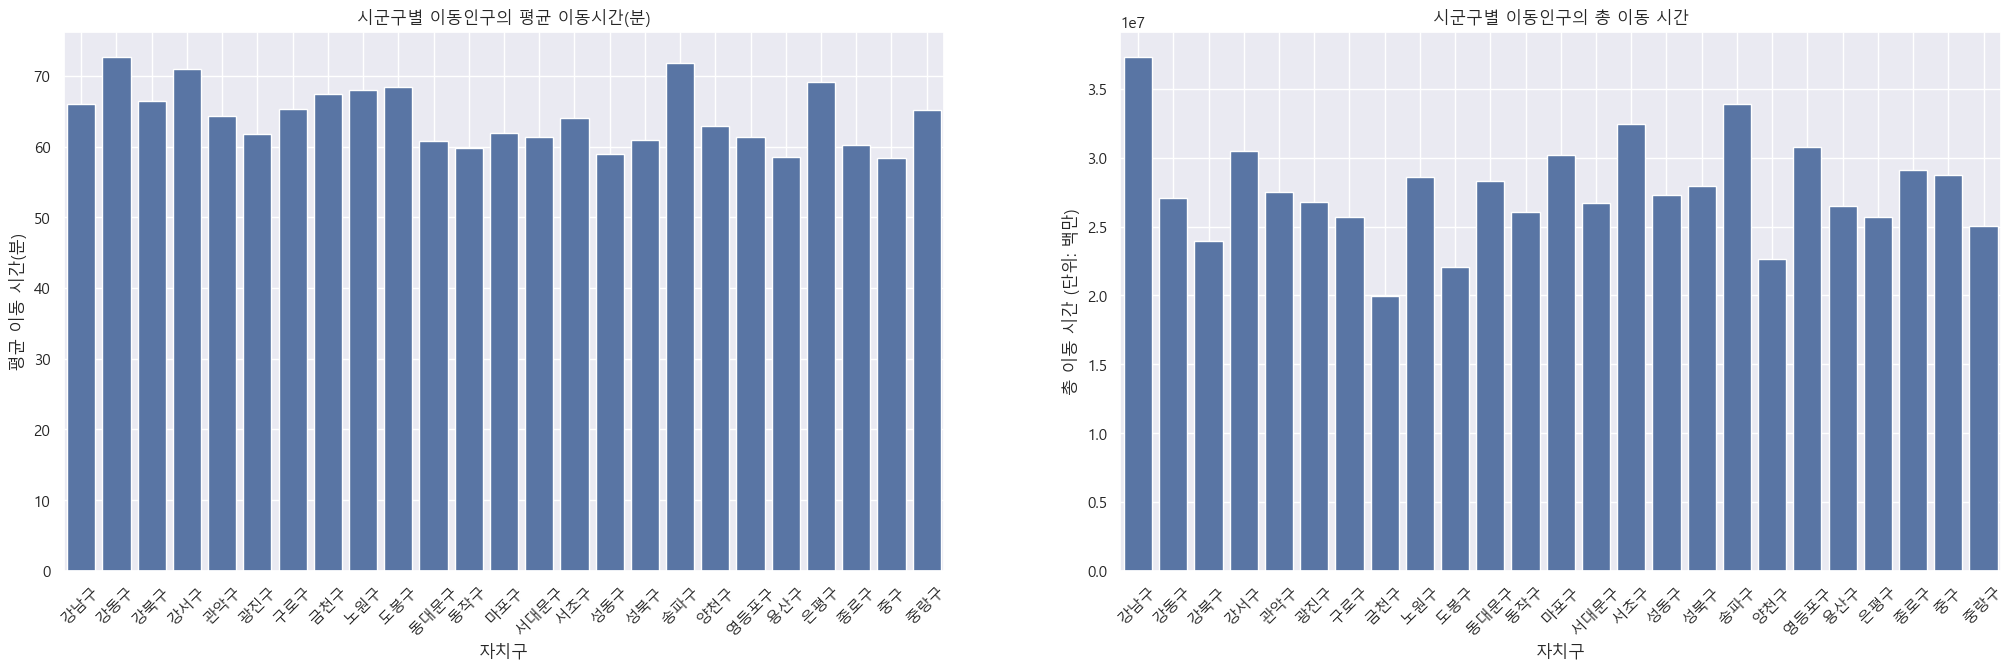

In [126]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(25, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='자치구', y='평균 이동 시간(분)', data=bus_moving_info)
plt.grid('X')
plt.title('시군구별 이동인구의 평균 이동시간(분)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='자치구', y='총 이동 시간', data=bus_moving_info)
plt.grid('x')
plt.ylabel('총 이동 시간 (단위: 백만)')
plt.title('시군구별 이동인구의 총 이동 시간')
plt.xticks(rotation=45)
plt.show()

In [127]:
bus_moving_info.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,66.010258,88.589932,37279755,50031784.36
1,강동구,72.597698,62.666853,27092372,23386329.60
2,강북구,66.486808,36.267589,23924081,13050239.21
3,강서구,70.960191,57.642191,30486485,24764699.10
4,관악구,64.366885,47.295307,27501846,20207723.99


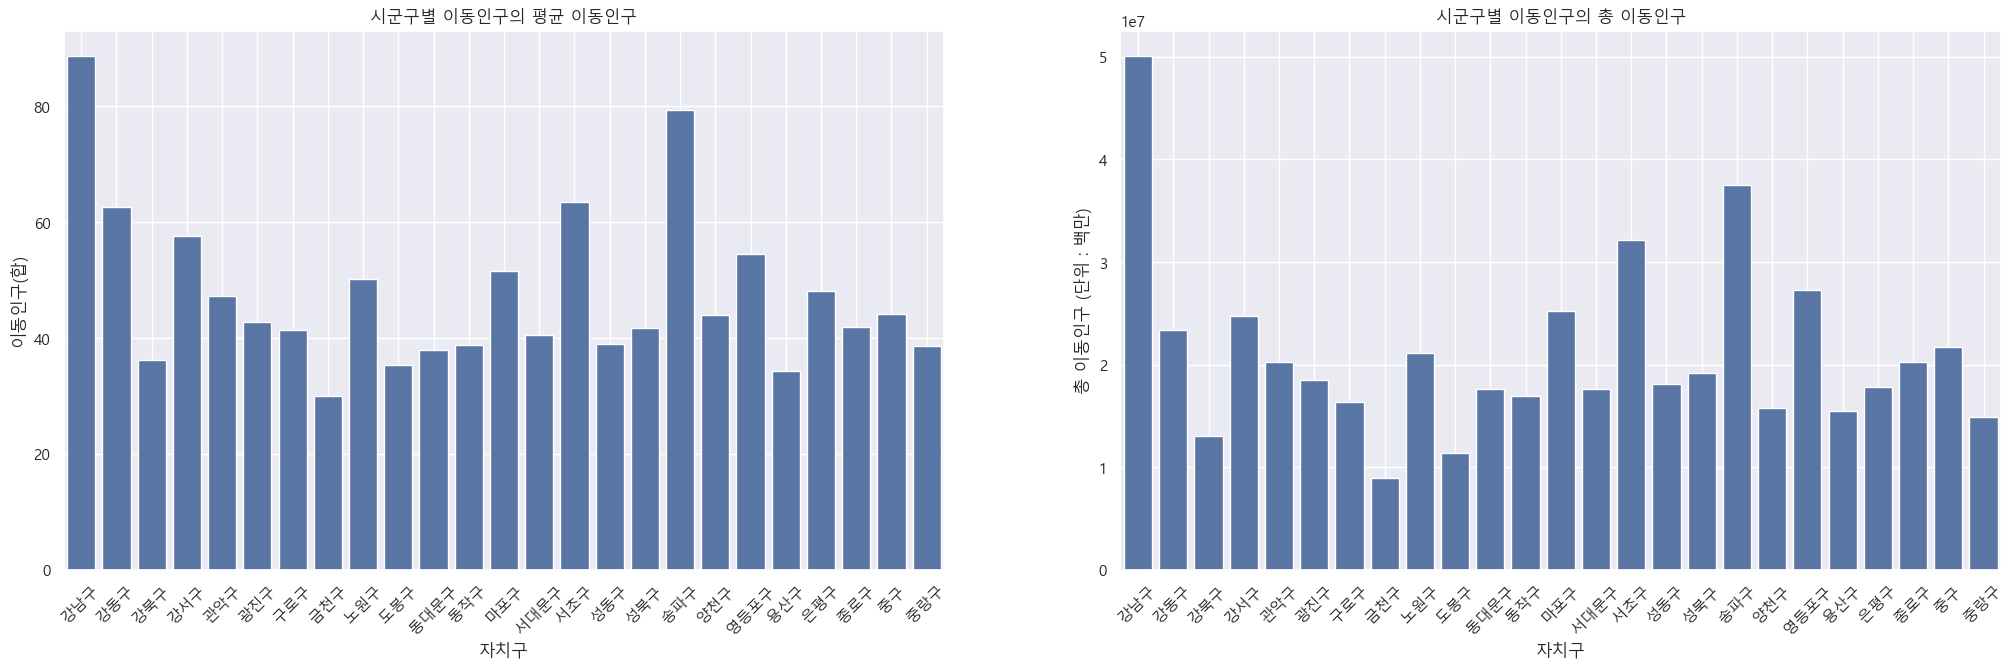

In [128]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(25, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='자치구', y='이동인구(합)', data=bus_moving_info)
plt.grid('X')
plt.title('시군구별 이동인구의 평균 이동인구')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='자치구', y='총 이동인구', data=bus_moving_info)
plt.grid('x')
plt.ylabel('총 이동인구 (단위 : 백만)')
plt.title('시군구별 이동인구의 총 이동인구')
plt.xticks(rotation=45)
plt.show()

In [129]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 평균 이동시간은 대체로 비슷, 총 이동시간은 강남구가 많음 (출, 퇴근 + 놀곳이 많아서?)
# 2. 이동 인구는 강남구가 가장 높음 (출, 퇴근 + 놀곳이 많아서?)
# 3. 사람들은 강남구, 송파구에 많이 찾아간다

---

In [130]:
bus_moving_info.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,66.010258,88.589932,37279755,50031784.36
1,강동구,72.597698,62.666853,27092372,23386329.60
2,강북구,66.486808,36.267589,23924081,13050239.21
3,강서구,70.960191,57.642191,30486485,24764699.10
4,관악구,64.366885,47.295307,27501846,20207723.99


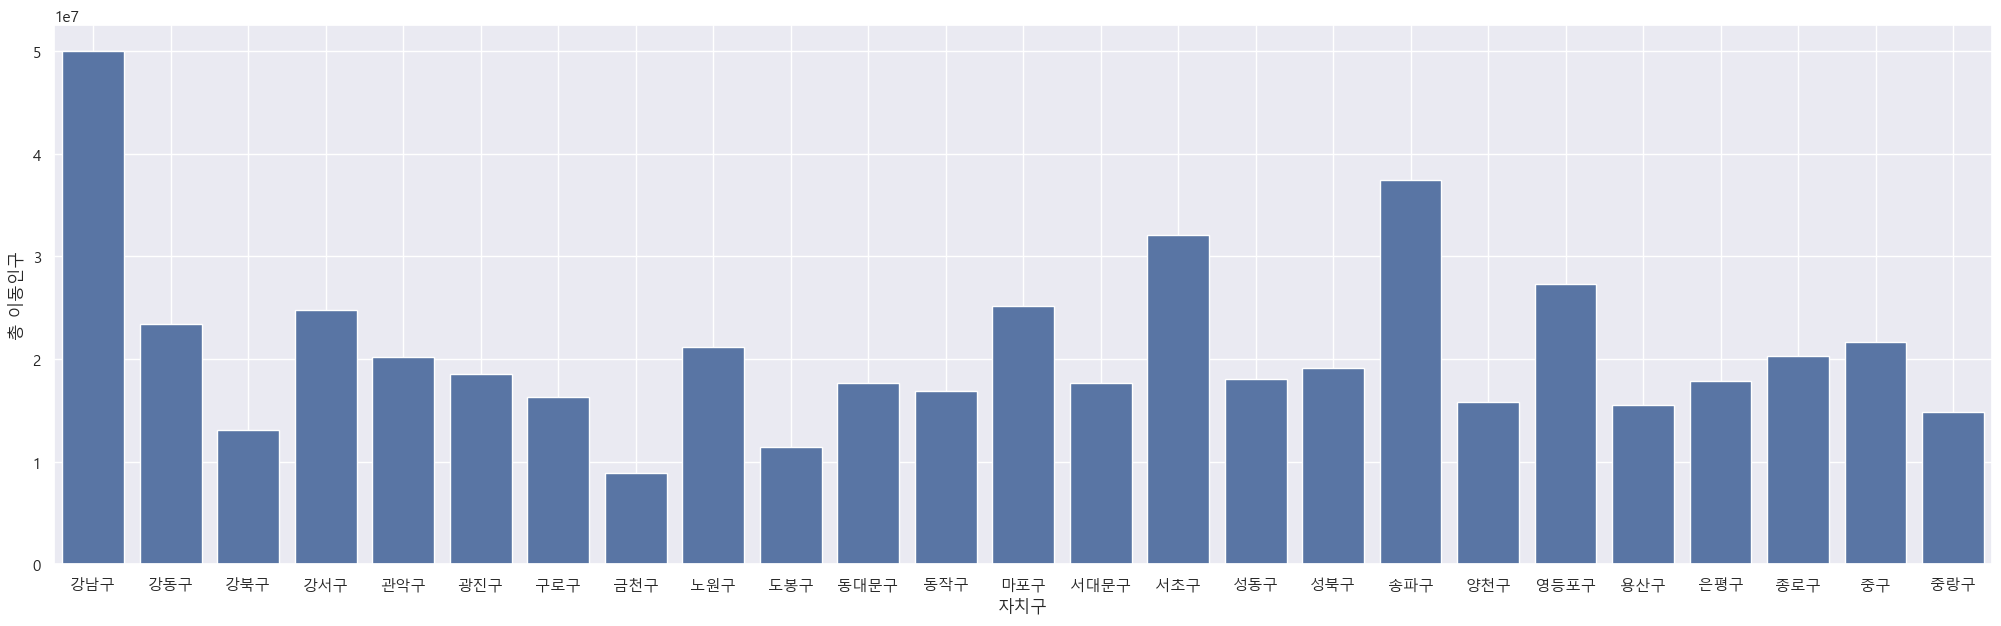

In [131]:
plt.figure(figsize=(25, 7))
sns.barplot(x='자치구', y='총 이동인구', data=bus_moving_info)
plt.grid('x')
plt.show()